# Libaries

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
from scipy import fftpack
from scipy.signal import butter, filtfilt, periodogram
from scipy.stats import entropy
from scipy.signal import welch
from scipy.stats import kurtosis
from scipy.stats import skew, kurtosis
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Args

In [3]:
input_dir = '/home/spanwar/Documents/collage/lectures/period-3/biosignal/Data'
sample_frequency = 200

# Load Data

`In this section, We loaded the input data and appended in DataFrame`

In [4]:
def get_input_file_paths(input_dir):
    data_path_dict = {}

    for _dir in os.listdir(input_dir):
        label       = _dir
        folder_path = os.path.join(input_dir, _dir)
        files       = os.listdir(folder_path)
        file_paths  = [os.path.join(folder_path, file) for file in files]

        data_path_dict[label] = file_paths
        # print(data_path_dict)
        
    return data_path_dict

def load_data(input_dir):
    data_path_dict = get_input_file_paths(input_dir)
    df             = pd.DataFrame()
    labels         = []
    paths          = []
    for label in data_path_dict.keys():
        for path in data_path_dict[label]:
            #print(label, path)
            paths.append(path)
            labels.append(label)
      
    #print(len(paths))
    df['path']  = paths
    df['label'] = labels
    df['data']  = df['path'].apply(lambda x: pd.read_csv(x))
    
    return df

In [5]:
df_input = load_data(input_dir)

In [6]:
df_input.shape

(105, 3)

In [7]:
df_input.head(1)

,path,label,data
0,/home/spanwar/Documents/collage/lectures/perio...,Breathing_speaking,accX accY accZ 0 0.11312...


In [8]:
df_input.data[0]

,accX,accY,accZ
0,0.113129,-2.552811,9.203293
1,0.161011,-2.600693,9.500183
2,0.098755,-2.567169,9.552856
3,0.132278,-2.562393,9.744385
4,0.161011,-2.519287,9.768326
...,...,...,...
995,-0.380081,-2.955032,9.102737
996,-0.269943,-3.031647,9.744385
997,-0.274734,-2.873627,9.074005
998,-0.145447,-3.007706,9.682144


# Raw Data Plots

`In this Section, We plot the raw data features for better understanding. It helps us to design the filtering technique. We have analysis single example.`

## Data Plot

`Plotting accX, accY, accZ of raw input data`

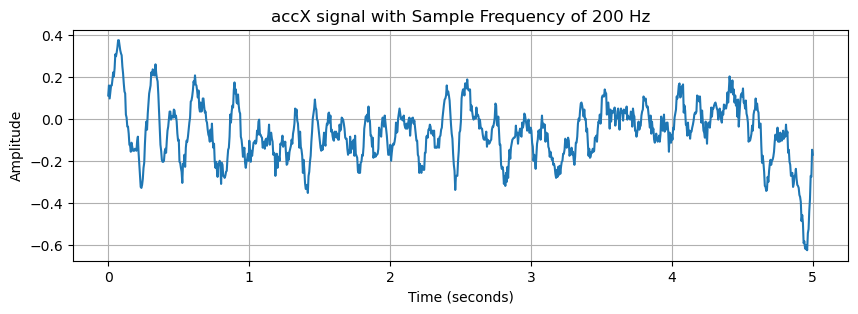

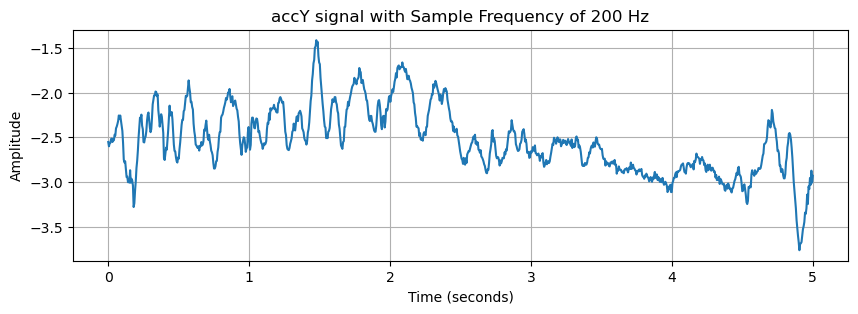

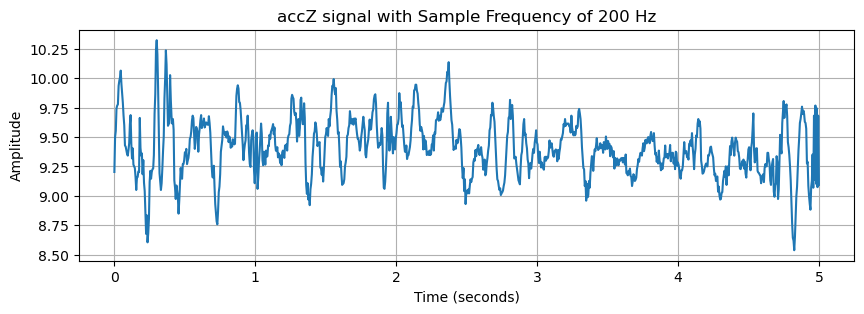

In [9]:
raw_data_df = df_input.data[0]

def plot_signal(raw_data_df):
    seconds_time = np.linspace(0,(len(raw_data_df)/sample_frequency),len(raw_data_df))

    # Plot the signal
    fig = plt.figure(figsize=(10, 3))
    plt.plot(seconds_time, raw_data_df.accX.to_numpy())
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('accX signal with Sample Frequency of 200 Hz')
    plt.grid(True)
    plt.show()

    fig = plt.figure(figsize=(10, 3))
    plt.plot(seconds_time, raw_data_df.accY.to_numpy())
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('accY signal with Sample Frequency of 200 Hz')
    plt.grid(True)
    plt.show()

    fig = plt.figure(figsize=(10, 3))
    plt.plot(seconds_time, raw_data_df.accZ.to_numpy())
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('accZ signal with Sample Frequency of 200 Hz')
    plt.grid(True)
    plt.show()
    
plot_signal(raw_data_df)

## DFT

`Plotting the signals (accX, accY, accZ) as function of frequency. `

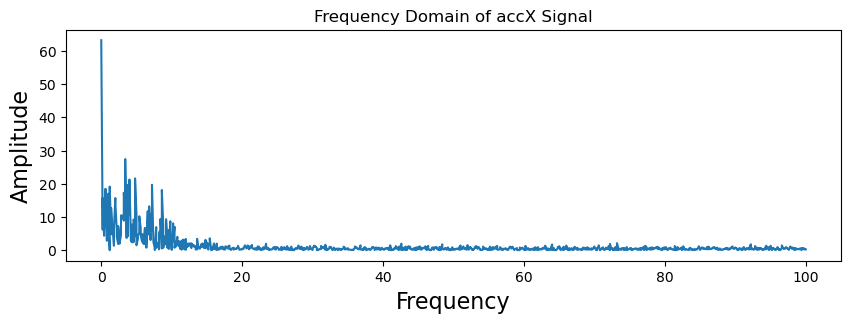

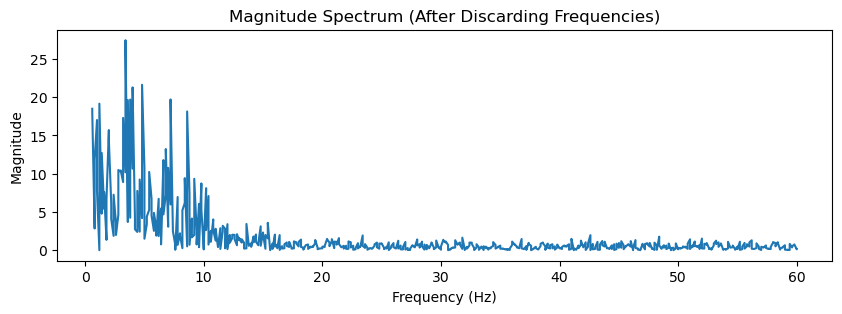

In [10]:
sig_len = len(raw_data_df)
accX_array = raw_data_df.accX.to_numpy()
sig_mean_removed = accX_array-np.mean(accX_array)


fx=fftpack.rfftfreq(sig_len,1/sample_frequency) #get freqs for x axis
fy=fftpack.rfft(accX_array) # get real value fft, from 0hz to Fs/2
plt.figure(figsize=(10,3))
plt.title("Frequency Domain of accX Signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(fx,np.abs(fy))
# plt.ylim(0,800)
plt.show()

mask = (fx >= 0.5) & (fx <= 60)
# print(mask)
# fx1 = fx[]
fx1 = fx[mask]
fy1 = fy[mask]

# Replot the magnitude versus frequency
plt.figure(figsize=(10,3))
plt.plot(fx1, np.abs(fy1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (After Discarding Frequencies)')
plt.show()

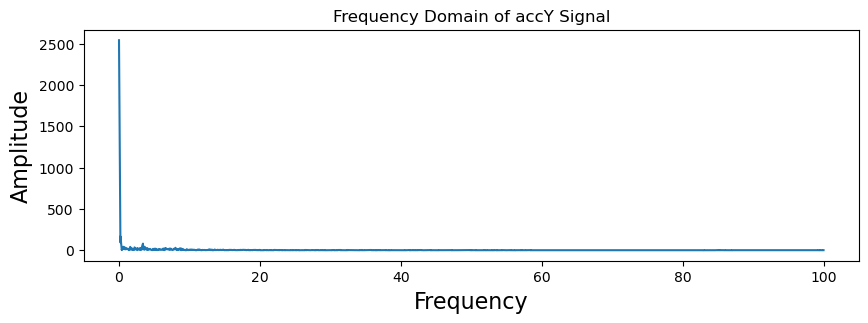

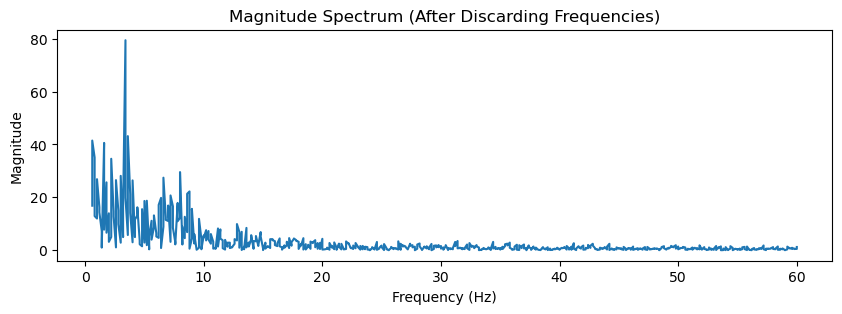

In [11]:
sig_len = len(raw_data_df)
accY_array = raw_data_df.accY.to_numpy()
sig_mean_removed = accY_array-np.mean(accY_array)


fx=fftpack.rfftfreq(sig_len,1/sample_frequency) #get freqs for x axis
fy=fftpack.rfft(accY_array) # get real value fft, from 0hz to Fs/2
plt.figure(figsize=(10,3))
plt.title("Frequency Domain of accY Signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(fx,np.abs(fy))
# plt.ylim(0,800)
plt.show()

mask = (fx >= 0.5) & (fx <= 60)
# print(mask)
# fx1 = fx[]
fx1 = fx[mask]
fy1 = fy[mask]

# Replot the magnitude versus frequency
plt.figure(figsize=(10,3))
plt.plot(fx1, np.abs(fy1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (After Discarding Frequencies)')
plt.show()

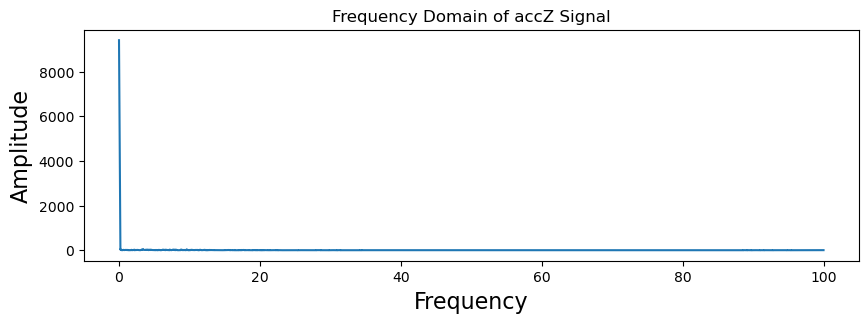

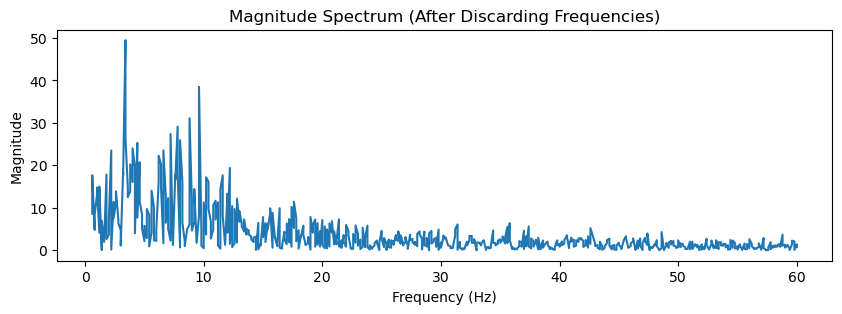

In [12]:
sig_len = len(raw_data_df)
accZ_array = raw_data_df.accZ.to_numpy()
sig_mean_removed = accZ_array-np.mean(accZ_array)


fx=fftpack.rfftfreq(sig_len,1/sample_frequency) #get freqs for x axis
fy=fftpack.rfft(accZ_array) # get real value fft, from 0hz to Fs/2
plt.figure(figsize=(10,3))
plt.title("Frequency Domain of accZ Signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(fx,np.abs(fy))
# plt.ylim(0,800)
plt.show()

mask = (fx >= 0.5) & (fx <= 60)
# print(mask)
# fx1 = fx[]
fx1 = fx[mask]
fy1 = fy[mask]

# Replot the magnitude versus frequency
plt.figure(figsize=(10,3))
plt.plot(fx1, np.abs(fy1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (After Discarding Frequencies)')
plt.show()

## Analysis

`By analyising the DFT plots of signals (accX, accY, accZ), We can conclude that important frequency in the signls are ranges from 0.5 to 20 hz`

# Band Pass Filter

`Designing the band pass filter with the help of above results`

In [13]:
 def filter_butterworth(df_raw, fc, btype):
    df_filtered = pd.DataFrame()
#     Wn = np.array(fc)/(sample_frequency/2)
    Wn = fc
    b, a = butter(3, Wn, btype =btype, analog=False, fs=sample_frequency)
    df_filtered["accX"] = filtfilt(b, a, df_raw["accX"])
    df_filtered["accY"] = filtfilt(b, a, df_raw["accY"])
    df_filtered["accZ"] = filtfilt(b, a, df_raw["accZ"])
#     df_filtered["accX"] = df_filtered["accX"].rolling(window=20).mean()
#     df_filtered["accY"] = df_filtered["accY"].rolling(window=20).mean()
#     df_filtered["accz"] = df_filtered["accZ"].rolling(window=20).mean()
    
    return df_filtered

In [18]:
df_input.columns

Index(['path', 'label', 'data'], dtype='object')

In [19]:
df_input['filtered_data'] = df_input['data'].apply(lambda x: filter_butterworth(x, fc=[0.5, 20], btype='band'))

## Plot Filtered Signals

`Plotted signal example after filtering.` 

In [16]:
raw_data_df_filtered = filter_butterworth(raw_data_df, fc=[0.1, 20], btype='band')

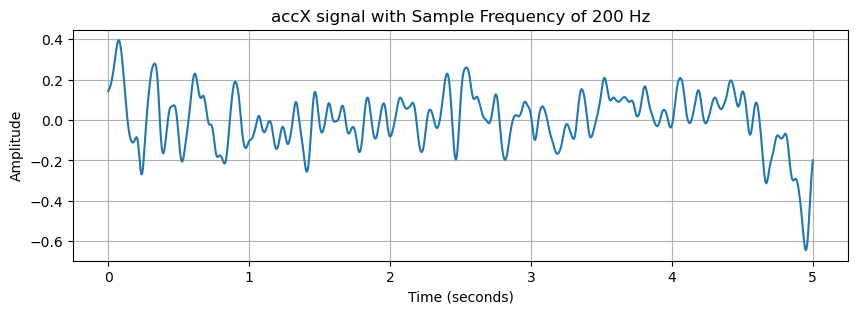

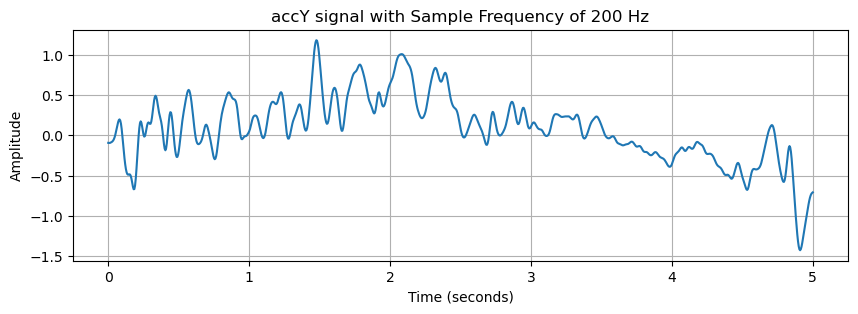

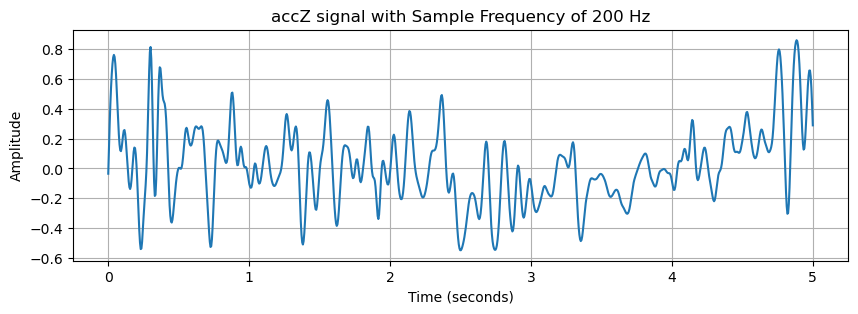

In [17]:
plot_signal(raw_data_df_filtered)

`As we clearly observe that signals are much more clear compare to raw input data`

# Feature Extraction

`Extracted the time and frequency Domain features`

In [20]:
# Time-domain features
def get_time_domain_features(signal):
    absolute_energy = np.sum(np.square(signal))
    rms_value       = np.sqrt(np.mean(np.square(signal)))
    mean_value      = np.mean(signal)
    median_value    = np.median(signal)
    std_deviation   = np.std(signal)
    kurtosis_value  = kurtosis(signal)
    skewness_value  = skew(signal)
    
    return absolute_energy, rms_value, mean_value, median_value, std_deviation, kurtosis_value, skewness_value

In [21]:
def calculate_spectral_entropy(signal, fs):
    #compute PSD
    freq, PSD = scipy.signal.welch(signal, fs, nperseg=256)
    #spectral entropy
    pk = PSD/np.sum(PSD)
    spectral_entropy = entropy(pk, base=2)
    return spectral_entropy, PSD

def calculate_power_band(signal, fs):
    band_list = [[0.1, 2], [0.5, 2.5], [2.5, 5.0], [5.0, 10.0], [10.0, 15.0], [15.0, 30.0]]
    power_band = []
    freq, PSD = scipy.signal.welch(signal, fs, nperseg=256)
    for freq_band in band_list:
        dr = freq_band[1] - freq_band[0]
        power_band.append(np.trapz(PSD[abs(freq - freq_band[0] - dr/2.0) <= dr/2.0]))
    return power_band

In [22]:
def extract_features(df):
    # signals
    signal_x = df.accX
    signal_y = df.accY
    signal_z = df.accZ
    
    # feature dict
    feature_dict = {}
    
    # help in addion of features to dict
    def add_features_to_dict(signal, name, _dict):
        (absolute_energy, rms_value, 
         mean_value, median_value, 
         std_deviation, kurtosis_value,
         skewness_value)                = get_time_domain_features(signal)
    
        _dict[f'{name}_absolute_energy'] = absolute_energy
        _dict[f'{name}_rms_value']       = rms_value 
        _dict[f'{name}_mean_value']      = mean_value
        _dict[f'{name}_median_value']    = median_value 
        _dict[f'{name}_std_deviation']   = std_deviation 
        _dict[f'{name}_kurtosis_value']  = kurtosis_value 
        _dict[f'{name}_skewness_value']  = skewness_value
        
        return _dict
        
    # time-domain features
    feature_dict = add_features_to_dict(signal_x, 'accX', feature_dict)
    feature_dict = add_features_to_dict(signal_y, 'accY', feature_dict)
    feature_dict = add_features_to_dict(signal_z, 'accZ', feature_dict)
    
    # Total SCG/GCG energy (assuming you have multiple channels)
    # Calculate the squared values of each channel
    squared_values_channel_x = np.square(signal_x)
    squared_values_channel_y = np.square(signal_y)
    squared_values_channel_z = np.square(signal_z)

    # Sum the squared values of each channel to get the total energy
    total_energy = (np.sum(squared_values_channel_x) + 
                    np.sum(squared_values_channel_y) + 
                    np.sum(squared_values_channel_z))

    
    # Frequency-domain features
    def add_frequency_domain_feature(signal, name, _dict):
        frequencies, psd = welch(signal, fs=sample_frequency, nperseg=256)  
        _dict            = add_features_to_dict(psd, 'psd', _dict)


        spectral_entropy, _ = calculate_spectral_entropy(signal, sample_frequency)
        power_band          = calculate_power_band(signal, sample_frequency)

        _dict[f'spectral_entropy_{name}'] = spectral_entropy
        _dict[f'power_band_{1}_{name}']  = power_band[0]
        _dict[f'power_band_{2}_{name}']  = power_band[1]    
        _dict[f'power_band_{3}_{name}']  = power_band[2]    
        _dict[f'power_band_{4}_{name}']  = power_band[3]    
        _dict[f'power_band_{5}_{name}']  = power_band[4]    
        _dict[f'power_band_{6}_{name}']  = power_band[5]  
        
        return _dict
    
    feature_dict = add_frequency_domain_feature(signal_x, 'accX', feature_dict)
    feature_dict = add_frequency_domain_feature(signal_y, 'accY', feature_dict)    
    feature_dict = add_frequency_domain_feature(signal_z, 'accZ', feature_dict)  
    
    return feature_dict

In [23]:
df_input.columns

Index(['path', 'label', 'data', 'filtered_data'], dtype='object')

In [24]:
feature_rows = [extract_features(row['filtered_data']) for index, row in df_input.iterrows()]
df_features  = pd.DataFrame.from_dict(feature_rows, orient='columns')

`Correalation Matrix`

In [25]:
df_features.corr()

,accX_absolute_energy,accX_rms_value,accX_mean_value,accX_median_value,accX_std_deviation,accX_kurtosis_value,accX_skewness_value,accY_absolute_energy,accY_rms_value,accY_mean_value,...,power_band_4_accY,power_band_5_accY,power_band_6_accY,spectral_entropy_accZ,power_band_1_accZ,power_band_2_accZ,power_band_3_accZ,power_band_4_accZ,power_band_5_accZ,power_band_6_accZ
accX_absolute_energy,1.000000,0.961311,0.488722,-0.345792,0.961222,0.415058,0.257692,0.734410,0.785981,0.293063,...,0.703317,0.530378,0.676955,-0.024170,-0.091126,-0.091144,-0.086654,-0.087577,-0.084453,-0.089155
accX_rms_value,0.961311,1.000000,0.420310,-0.333060,0.999997,0.402734,0.202209,0.784076,0.860857,0.291271,...,0.762488,0.609956,0.750197,0.077448,-0.206044,-0.206093,-0.198197,-0.199855,-0.193678,-0.203074
accX_mean_value,0.488722,0.420310,1.000000,0.382675,0.419480,0.261877,0.412155,0.094822,0.170770,0.094847,...,0.206060,0.046637,0.056493,0.014206,-0.074805,-0.074966,-0.060925,-0.068109,-0.064415,-0.068460
accX_median_value,-0.345792,-0.333060,0.382675,1.000000,-0.333612,-0.090144,-0.186246,-0.346427,-0.319794,-0.036458,...,-0.120812,-0.154452,-0.335406,0.038606,-0.022287,-0.022399,-0.007629,-0.014590,-0.016487,-0.013845
accX_std_deviation,0.961222,0.999997,0.419480,-0.333612,1.000000,0.402758,0.202129,0.784622,0.861214,0.290778,...,0.762902,0.610292,0.750718,0.077590,-0.206129,-0.206178,-0.198235,-0.199915,-0.193731,-0.203136
accX_kurtosis_value,0.415058,0.402734,0.261877,-0.090144,0.402758,1.000000,0.211218,0.172603,0.200953,0.021730,...,0.236389,0.174631,0.133952,0.130682,-0.192018,-0.191857,-0.178371,-0.182471,-0.169866,-0.188127
accX_skewness_value,0.257692,0.202209,0.412155,-0.186246,0.202129,0.211218,1.000000,0.117924,0.117584,0.117134,...,0.093214,0.080522,0.068950,0.074166,-0.102608,-0.102864,-0.103791,-0.103628,-0.097348,-0.104516
accY_absolute_energy,0.734410,0.784076,0.094822,-0.346427,0.784622,0.172603,0.117924,1.000000,0.957254,0.185179,...,0.817275,0.572592,0.743302,-0.029522,-0.095124,-0.095139,-0.090215,-0.091155,-0.087870,-0.092862
accY_rms_value,0.785981,0.860857,0.170770,-0.319794,0.861214,0.200953,0.117584,0.957254,1.000000,0.227790,...,0.868229,0.653146,0.797236,0.079072,-0.219892,-0.219913,-0.209463,-0.211100,-0.204192,-0.215047
accY_mean_value,0.293063,0.291271,0.094847,-0.036458,0.290778,0.021730,0.117134,0.185179,0.227790,1.000000,...,0.238976,0.457427,0.282791,-0.080912,0.053941,0.054043,0.030339,0.038643,0.027046,0.040875


In [28]:
df_input.shape

(105, 4)

In [29]:
df_features.shape

(105, 49)

# PCA and Ploting

In [33]:
set(df_input.label.to_list())

{'Breathing_deep', 'Breathing_normal', 'Breathing_speaking', 'Not_connected'}

/tmp/ipykernel_15943/1179444820.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_labels)


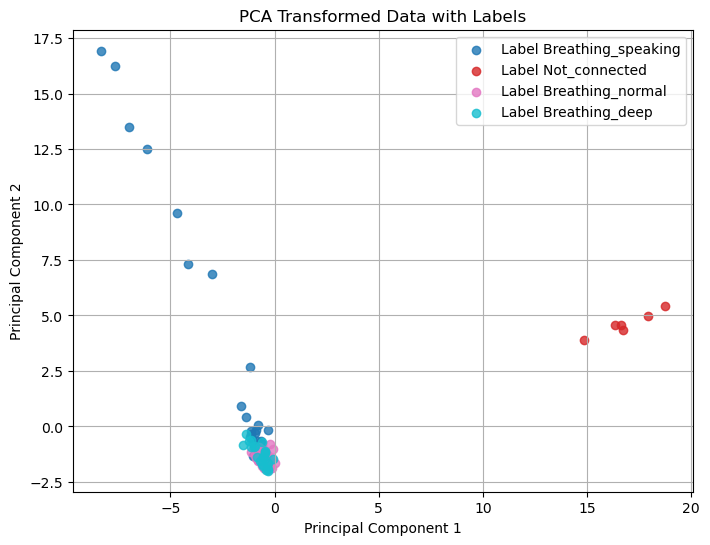

In [36]:
# PCA
scaler = StandardScaler()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(df_features))

# Plotting
num_labels = len(set(df_input.label.to_list()))
colors = plt.cm.get_cmap('tab10', num_labels)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot with labels
for label_idx, color in zip(set(df_input.label.to_list()), colors.colors):
    plt.scatter(X_pca[df_input.label == label_idx, 0], X_pca[df_input.label == label_idx, 1], label=f'Label {label_idx}', color=color, alpha=0.8)

plt.title('PCA Transformed Data with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

plt.show()

`As we plot 2 principal component with the labels, We clearly observe that Breathing_speaking and Not_connected are very unique other than other labels. Whereas Breathing_normal and Brething_deep are very near and little hard to distigush apart.`

# Standarization

`Uses standard scaling from sklearn`

In [66]:
def standard_scale(train, test):
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    return train_scaled, test_scaled

# Model Training

`Uses Leave one out cross validation for measuring the accuracy of the model.`

## Model-1

`First model we choose is KNN Classifier`

In [116]:
def train_model_1(df_input, df_features):
    
    # data
    X = df_features.to_numpy()
    y = df_input.label.to_numpy()
    
    # Perform LOOCV
    loo = LeaveOneOut()
    
    true_y = []
    pred_y = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Scaling
        X_train_scaled, X_test_scaled = standard_scale(X_train, X_test)
        
        # training
        knn = KNeighborsClassifier(n_neighbors=5)
        
        knn.fit(X_train_scaled, y_train)
        
        pred = knn.predict(X_test_scaled)
        
        true_y.append(y_test)
        pred_y.append(pred)
        
    return true_y, pred_y

In [128]:
true_y_1, pred_y_1 = train_model_1(df_input, df_features)

## Model-2

`Second model we choose is random forest.`

In [133]:
def train_model_2(df_input, df_features):
    
    # data
    X = df_features.to_numpy()
    y = df_input.label.to_numpy()
    
    # Perform LOOCV
    loo = LeaveOneOut()
    
    # model
    rf_model = RandomForestClassifier()
    
    true_y = []
    pred_y = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Scaling
        X_train_scaled, X_test_scaled = standard_scale(X_train, X_test)
        
        # training
        rf_model.fit(X_train_scaled, y_train)
        
        pred = rf_model.predict(X_test_scaled)
        
        true_y.append(y_test)
        pred_y.append(pred)
        
    return true_y, pred_y

In [139]:
true_y_2, pred_y_2 = train_model_2(df_input, df_features)

# Results

In [140]:
# pred_y, true_y

`Plotted results and confusion matrix`

In [146]:
def get_results(y_true, y_pred, probs):
    print("Labels: normal, deep, speak, not connected")
    print()
    print("Confusion matrix:")
    print(metrics.confusion_matrix(y_true, y_pred))
    cm   = metrics.confusion_matrix(y_true, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'deep', 'speak', 'not connected'])
    disp.plot()
    print()
    print("Accurcay:")
    print(metrics.accuracy_score(y_true, y_pred))
    print()
    print("Precision:")
    print(metrics.precision_score(y_true, y_pred, average=None))
    print()
    print("Recall:")
    print(metrics.recall_score(y_true, y_pred, average=None))
    print()
    print("F1 score:")
    print(metrics.f1_score(y_true, y_pred, average=None))
    print(metrics.f1_score(y_true, y_pred, average='weighted'))

Labels: normal, deep, speak, not connected

Confusion matrix:
[[ 8 16  0  0]
 [ 2 48  0  0]
 [ 3 12 10  0]
 [ 0  0  0  6]]

Accurcay:
0.6857142857142857

Precision:
[0.61538462 0.63157895 1.         1.        ]

Recall:
[0.33333333 0.96       0.4        1.        ]

F1 score:
[0.43243243 0.76190476 0.57142857 1.        ]
0.6548507691364834


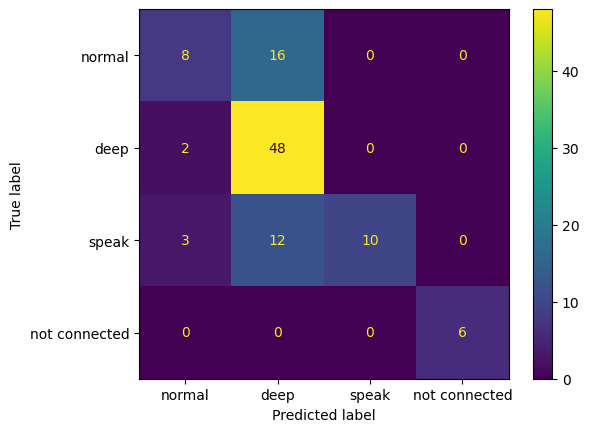

In [147]:
get_results(true_y_1, pred_y_1)

Labels: normal, deep, speak, not connected

Confusion matrix:
[[12  8  4  0]
 [ 4 46  0  0]
 [ 4  0 21  0]
 [ 0  0  0  6]]

Accurcay:
0.8095238095238095

Precision:
[0.6        0.85185185 0.84       1.        ]

Recall:
[0.5  0.92 0.84 1.  ]

F1 score:
[0.54545455 0.88461538 0.84       1.        ]
0.803063603063603


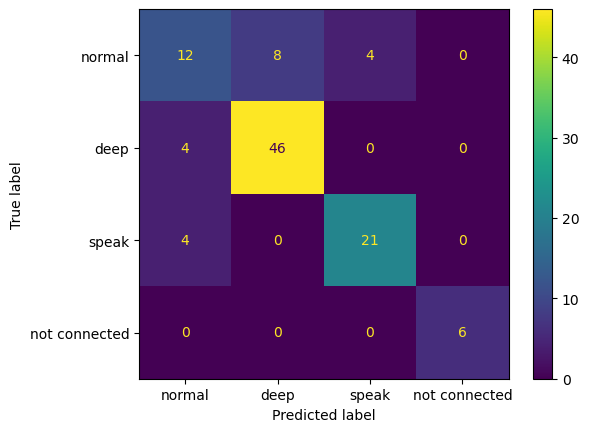

In [148]:
get_results(true_y_2, pred_y_2)

`As we can clearly observe, Random forest have perform very well compare to KNN classifier. This can also explained by observing PCA plot. When data that are near does not mean they are belong to same class.`